## Аналитика авиакомпаний

Импортируем все нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None) 


Изучим данные в датафреймах

In [3]:
# датафрейм с инфой о самолётах
aircrafts = pd.read_csv('query_1.csv')

In [4]:
# датафрейм с инфой о городах
cities = pd.read_csv('query_3.csv')

In [5]:
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
aircrafts

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [7]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
cities['average_flights'] = cities['average_flights'].astype('float')

Пропущенных значений в датасетах нет.Только в одном столбце среднего количества полетов для большего удобства изменили тип на float.

In [9]:
# сортируем по убыванию по количеству налёта километров каждой модели
aircrafts_upd = aircrafts.sort_values(by = 'flights_amount', ascending = False).reset_index(drop = True)

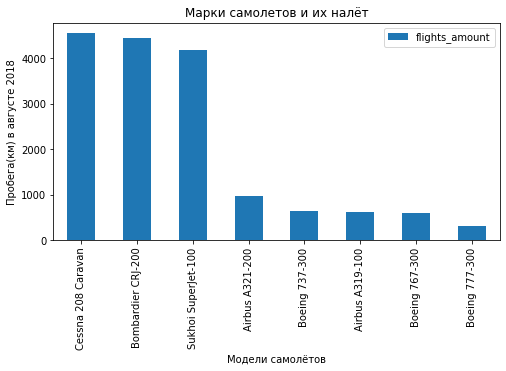

In [10]:
aircrafts_upd.plot(y = 'flights_amount', x = 'model', kind = 'bar', figsize = (8,4))
plt.title('Марки самолетов и их налёт')
plt.xlabel('Модели самолётов')
plt.ylabel('Пробега(км) в августе 2018')
plt.show()

Как можем заметить, самыми востребованными за отчётный период были: 
- Cessna 208 Caravan	4557 км
- Bombardier CRJ-200	4446 км
- Sukhoi SuperJet-100	4185 км

Они с большим преимуществом обогнали другие самолёты, у которых налёт не доходит и до 1000 км. 

In [11]:
cities_sorted = cities.sort_values(by = 'average_flights', ascending = False)

In [12]:
cities_sorted.head(20)

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


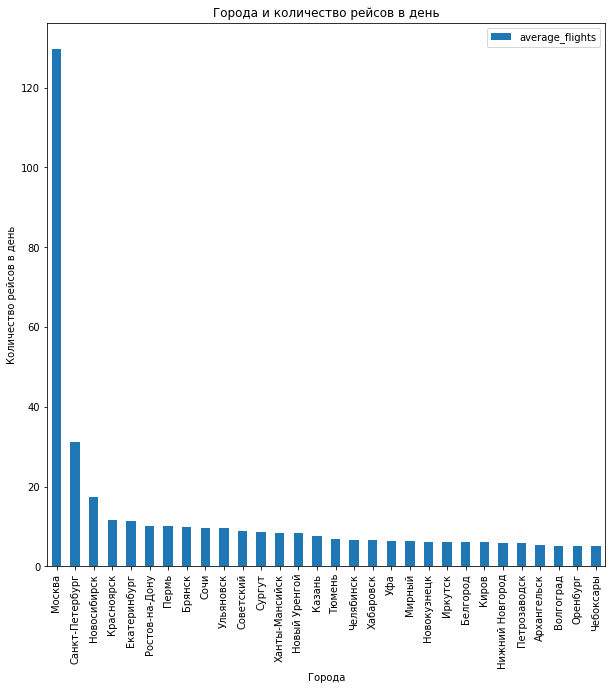

In [13]:
# общая таблица с городами и количеством рейсов в день
cities_sorted.head(30).plot(x = 'city', y = 'average_flights', kind = 'bar', figsize = (10,10))
plt.title('Города и количество рейсов в день')
plt.xlabel('Города')
plt.ylabel('Количество рейсов в день')
plt.show()

In [14]:
# топ-10 городов и количество рейсов
cities_10 = cities_sorted.head(10)

На общей картине заметен отрыв Москвы от остальных городов и почётное второе место Санкт-петербурга, в то время как остальные значительно отстали. 

In [15]:
cities_10 

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


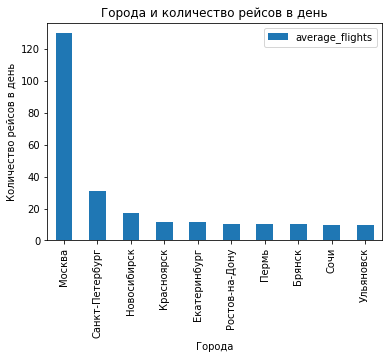

In [16]:
cities_10.plot(x = 'city', y = 'average_flights', kind = 'bar')
plt.title('Города и количество рейсов в день')
plt.xlabel('Города')
plt.ylabel('Количество рейсов в день')
plt.show()

Москва лидирует с большим отрывом, имея в среднем 129 рейсов в день. Санкт-Петрбург второй с 31 рейсом в среднем в день. 
В остальных городах - менее 20 рейсов в день.